In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\redka\anaconda3\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [121]:
# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [122]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# # Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [123]:
df.rename(columns = {'koi_disposition':'Likelihood', 'koi_fpflag_nt':'Not_transitLikeP_flag', 'koi_fpflag_ss':'Stellar_Eclipse_Flag',
                     'koi_fpflag_co':'Centroid_Offset_Flag', 'koi_fpflag_ec':'Ephemeris_Match_Indicates_Contamination_Flag', 
                     'koi_srad':'Score'}, inplace = True) 

# After renaming the columns 
print(df.columns) 

Index(['Likelihood', 'Not_transitLikeP_flag', 'Stellar_Eclipse_Flag',
       'Centroid_Offset_Flag', 'Ephemeris_Match_Indicates_Contamination_Flag',
       'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk',
       'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1',
       'koi_impact_err2', 'koi_duration', 'koi_duration_err1',
       'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2',
       'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_steff', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg',
       'koi_slogg_err1', 'koi_slogg_err2', 'Score', 'koi_srad_err1',
       'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')


In [124]:
df.head()

,Likelihood,Not_transitLikeP_flag,Stellar_Eclipse_Flag,Centroid_Offset_Flag,Ephemeris_Match_Indicates_Contamination_Flag,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,Score,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [125]:
# Set features. This will also be used as your x values.
X = df[['Not_transitLikeP_flag', 'Stellar_Eclipse_Flag', 'Centroid_Offset_Flag', 'Ephemeris_Match_Indicates_Contamination_Flag', 
        'Score']]

# Create a Train Test Split

Use `koi_disposition` for the y values

In [126]:
# Set features. This will also be used as your x values.
X = df[['Not_transitLikeP_flag', 'Stellar_Eclipse_Flag', 'Centroid_Offset_Flag', 'Ephemeris_Match_Indicates_Contamination_Flag', 
        'Score']]
y = df["Likelihood"].values.reshape(-1, 1)
print(X.shape, y.shape)

(6991, 5) (6991, 1)


In [127]:
X_copy = X.copy()

data_binary_encoded = pd.get_dummies(df, columns=["Likelihood"])
data_binary_encoded.head()

,Not_transitLikeP_flag,Stellar_Eclipse_Flag,Centroid_Offset_Flag,Ephemeris_Match_Indicates_Contamination_Flag,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_slogg_err2,Score,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,Likelihood_CANDIDATE,Likelihood_CONFIRMED,Likelihood_FALSE POSITIVE
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,0,1,0
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,0,0,1
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0,0,1
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,0,1,0
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714,0,1,0


In [150]:
from sklearn.model_selection import train_test_split
X = df[['Not_transitLikeP_flag', 'Stellar_Eclipse_Flag', 'Centroid_Offset_Flag', 'Ephemeris_Match_Indicates_Contamination_Flag', 
        'Score']]
y = pd.get_dummies(df, columns=["Likelihood"])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,Not_transitLikeP_flag,Stellar_Eclipse_Flag,Centroid_Offset_Flag,Ephemeris_Match_Indicates_Contamination_Flag,Score
6122,0,0,0,0,1.125
6370,0,1,0,1,0.797
2879,1,0,0,0,0.963
107,0,0,0,0,0.779
29,0,0,0,0,1.082


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [151]:
# Scale your data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [152]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

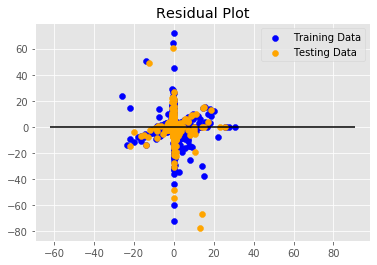

In [153]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

# Train the Model



In [154]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: -0.020666788156137157
Testing Data Score: -0.0067194654564267185


C:\Users\redka\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\redka\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [155]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import style
style.use("ggplot")

In [156]:
from sklearn.model_selection import train_test_split
X = df[['Not_transitLikeP_flag', 'Stellar_Eclipse_Flag', 'Centroid_Offset_Flag', 'Ephemeris_Match_Indicates_Contamination_Flag', 
        'Score']]
y = pd.get_dummies(df, columns=["Likelihood"])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [157]:
# Create the SVC Model
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [158]:
# Create the GridSearchCV model
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)


In [159]:
# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=1, gamma=0.0001 ...............................................


C:\Users\redka\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\redka\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:530: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: bad input shape (3495, 43)

In [ ]:
# Train the model with GridSearch

In [ ]:
print(grid2.best_params_)
print(grid2.best_score_)

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)